In [1]:
import pandas as pd

all_trades = pd.read_excel('congress-trading-all (3).xlsx')

all_trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46467 entries, 0 to 46466
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Ticker              46466 non-null  object        
 1   TickerType          33530 non-null  object        
 2   Company             46466 non-null  object        
 3   Traded              46467 non-null  datetime64[ns]
 4   Transaction         46467 non-null  object        
 5   Trade_Size_USD      46467 non-null  object        
 6   Status              46377 non-null  object        
 7   Subholding          27395 non-null  object        
 8   Description         4357 non-null   object        
 9   Name                46467 non-null  object        
 10  Filed               46467 non-null  object        
 11  Party               46467 non-null  object        
 12  District            36400 non-null  object        
 13  Chamber             46467 non-null  object    

In [3]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
# Convert 'Traded' column to datetime format
all_trades['Traded'] = pd.to_datetime(all_trades['Traded'])

# Filter rows for the year 2023
trades_2023 = all_trades[(all_trades['Traded'] >= '2023-01-01') & (all_trades['Traded'] < '2024-01-01')]


trades_2023.head()

,Ticker,TickerType,Company,Traded,Transaction,Trade_Size_USD,Status,Subholding,Description,Name,Filed,Party,District,Chamber,Comments,Quiver_Upload_Time,excess_return,State,last_modified
439,DVN,ST,DEVON ENERGY CORPORATION,2023-12-29,Purchase,"$1,001 - $15,000",NEW,HERN FAMILY FOUNDATION,DIVIDEND REINVESTMENT,Kevin Hern,2024-01-13,R,OK01,House,NaN,2024-01-15,-2.481609,Oklahoma,2024-01-15
440,TFC,Stock,Truist Financial Corp,2023-12-29,Sale (Partial),"$15,001 - $50,000",New,NaN,NaN,"Capito, Shelley Moore",2024-01-12,R,NaN,Senate,NaN,2024-01-12,-13.182654,West Virginia,2024-01-12
441,NOC,ST,NORTHROP GRUMMAN CORPORATION,2023-12-29,Purchase,"$15,001 - $50,000",NEW,MORGAN STANLEY - SELECT UMA ACCOUNT # 1,NaN,Josh Gottheimer,2024-01-07,D,NJ05,House,NaN,2024-01-09,-8.967998,New Jersey,2024-01-09
442,SCHW,ST,CHARLES SCHWAB CORPORATION,2023-12-29,Sale,"$50,001 - $100,000",NEW,HILL 2012 TRUST (FORMERLY JAY F HILL TRUST),NaN,James French Hill,2024-01-10,R,AR02,House,NaN,2024-01-11,-10.161162,Arkansas,2024-01-11
443,PYPL,ST,"PAYPAL HOLDINGS, INC.",2023-12-29,Sale,"$15,001 - $50,000",NEW,HILL 2012 TRUST (FORMERLY JAY F HILL TRUST),NaN,James French Hill,2024-01-10,R,AR02,House,NaN,2024-01-11,-5.258127,Arkansas,2024-01-11


Basic insights of original Data Set 


In [4]:
import yfinance as yf
top_ten_traded_2023 = ['MSFT',
'AAPL',
'CLF',    
'NVDA' ,   
'KO',      
'ABBV' ,   
'LLY' ,    
'JNJ' ,    
'TSLA']  

# Dictionary to store DataFrames
stock_data = {}

start_date = '2023-01-01'
end_date = '2024-01-01'

# Download and store data for each ticker
for ticker in top_ten_traded_2023:
    # Download the data
    stock_data[ticker] = yf.download(ticker, start=start_date, end=end_date)[['Close']]
    print(f"Data for {ticker} downloaded and stored in DataFrame")

# Print out the keys (tickers) in the dictionary to verify
print("\nLoaded tickers:", list(stock_data.keys()))

# Example: Access the data for a specific stock (e.g., AAPL)
print("\nFirst few rows of AAPL data:")
print(stock_data['AAPL'].head())

# Example: Get the shape of each DataFrame
for ticker, df in stock_data.items():
    print(f"{ticker} data shape: {df.shape}")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for MSFT downloaded and stored in DataFrame
Data for AAPL downloaded and stored in DataFrame


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for CLF downloaded and stored in DataFrame
Data for NVDA downloaded and stored in DataFrame


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for KO downloaded and stored in DataFrame
Data for ABBV downloaded and stored in DataFrame


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Data for LLY downloaded and stored in DataFrame
Data for JNJ downloaded and stored in DataFrame


[*********************100%%**********************]  1 of 1 completed

Data for TSLA downloaded and stored in DataFrame

Loaded tickers: ['MSFT', 'AAPL', 'CLF', 'NVDA', 'KO', 'ABBV', 'LLY', 'JNJ', 'TSLA']

First few rows of AAPL data:
                 Close
Date                  
2023-01-03  125.070000
2023-01-04  126.360001
2023-01-05  125.019997
2023-01-06  129.619995
2023-01-09  130.149994
MSFT data shape: (250, 1)
AAPL data shape: (250, 1)
CLF data shape: (250, 1)
NVDA data shape: (250, 1)
KO data shape: (250, 1)
ABBV data shape: (250, 1)
LLY data shape: (250, 1)
JNJ data shape: (250, 1)
TSLA data shape: (250, 1)


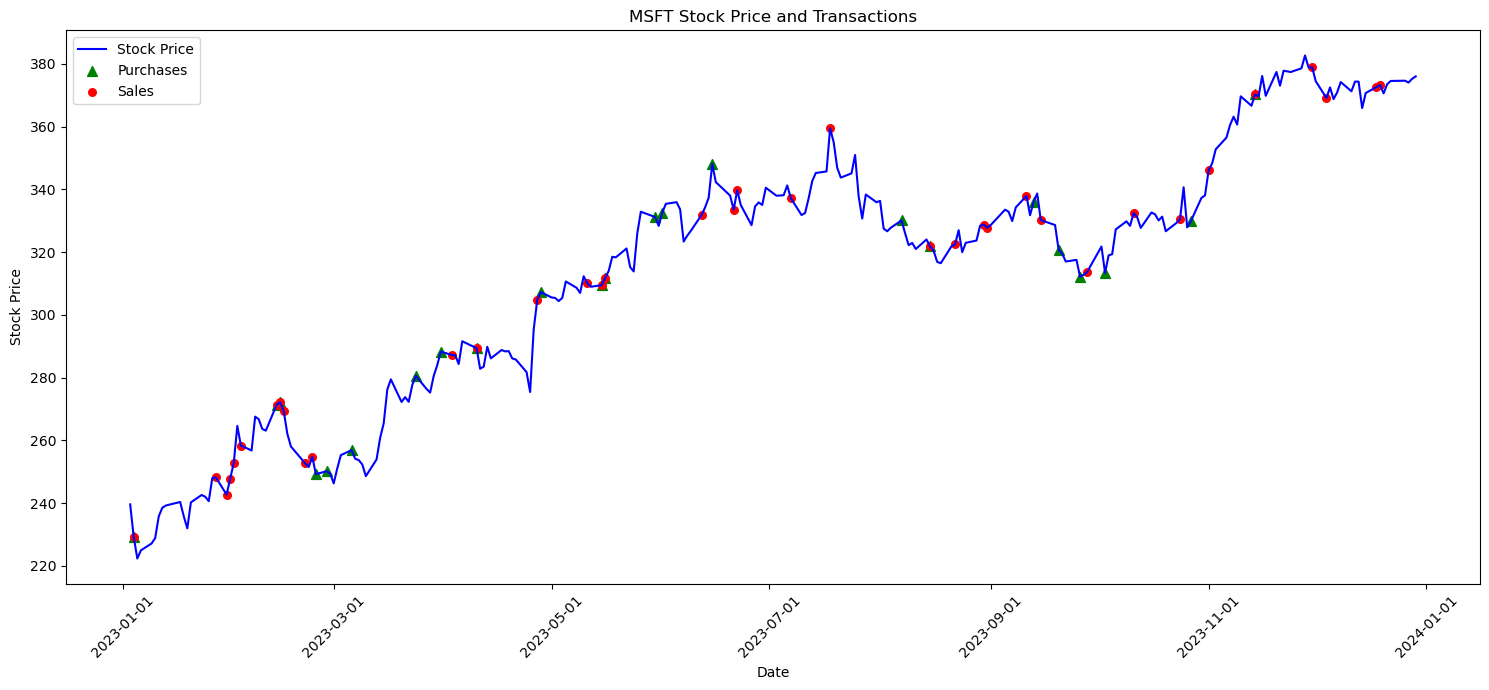

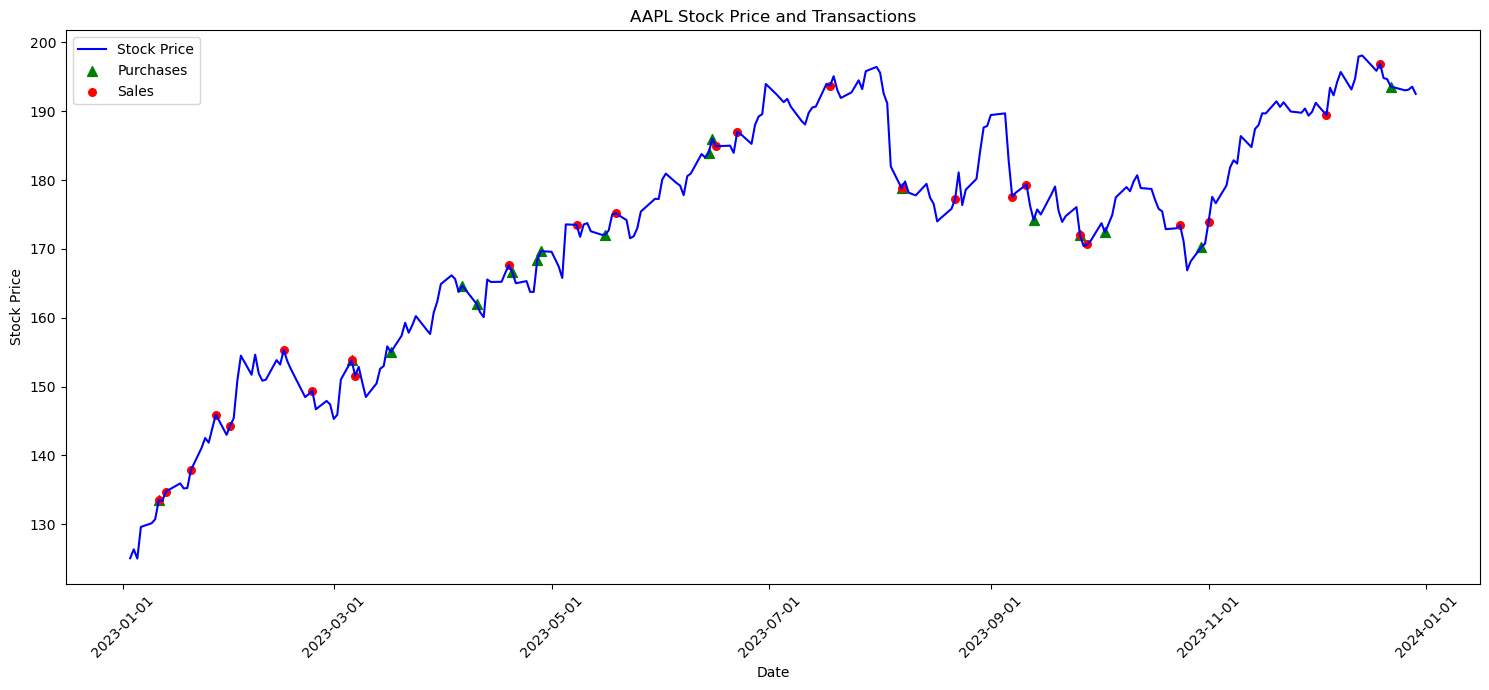

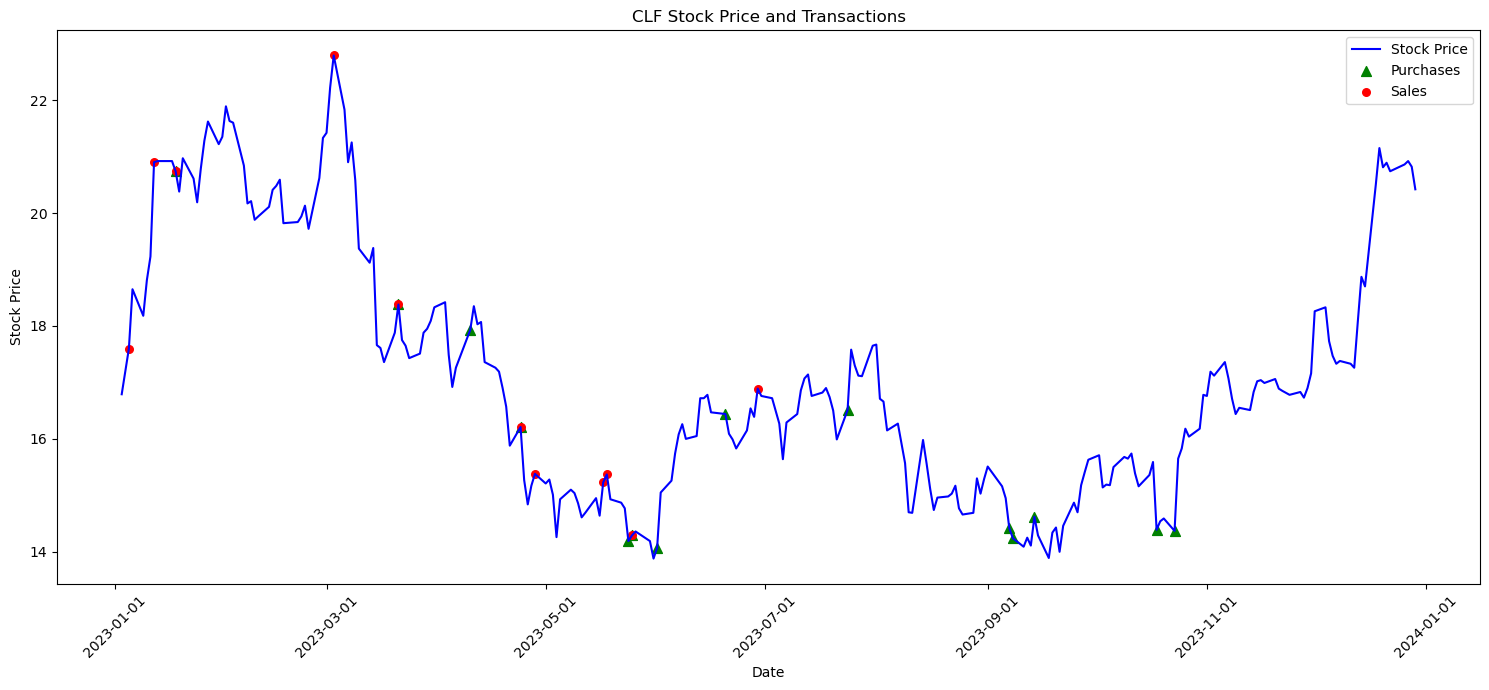

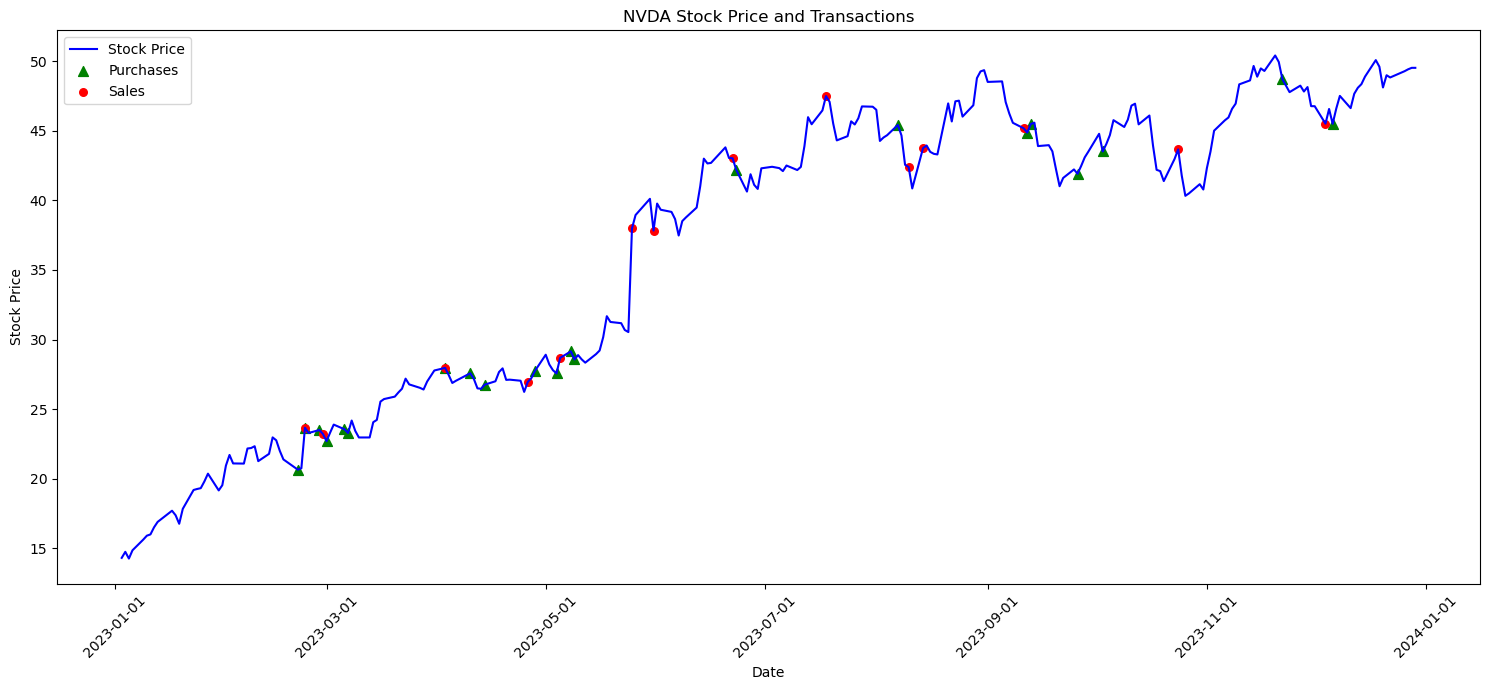

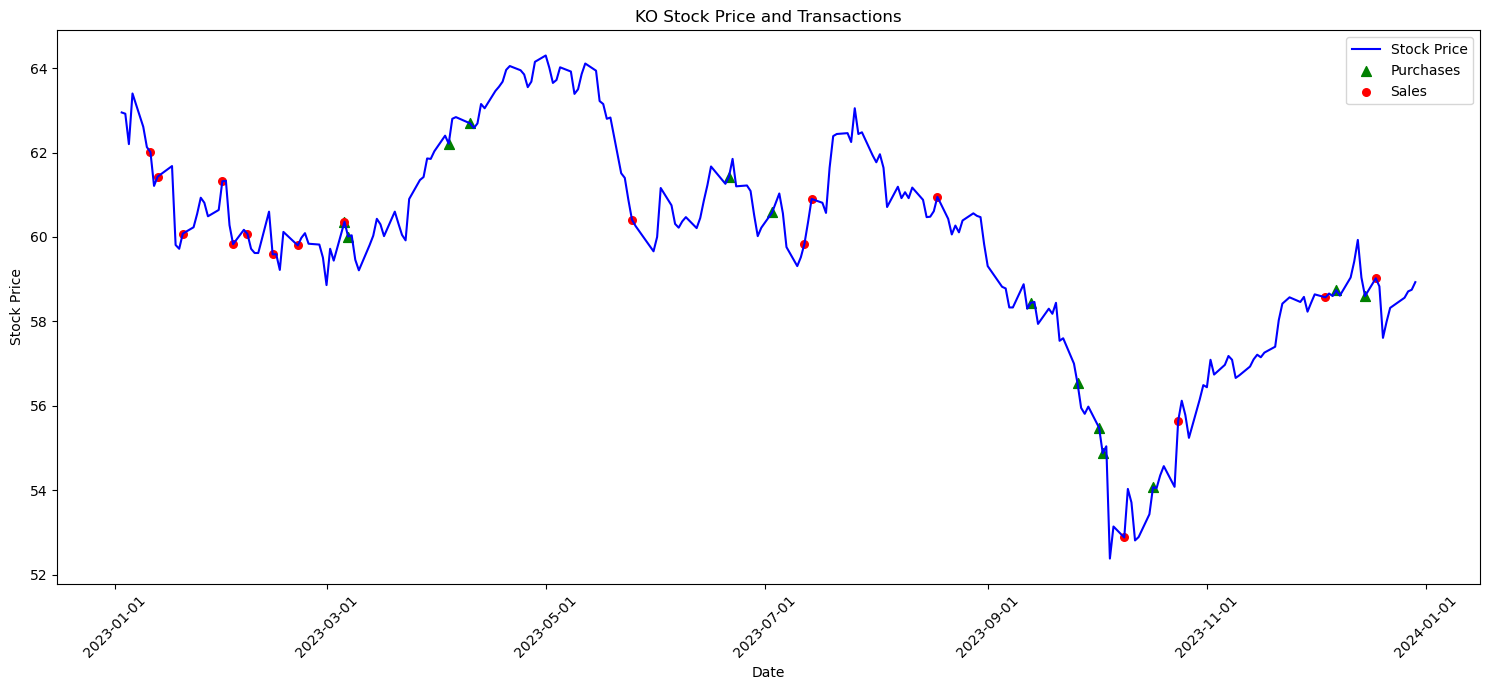

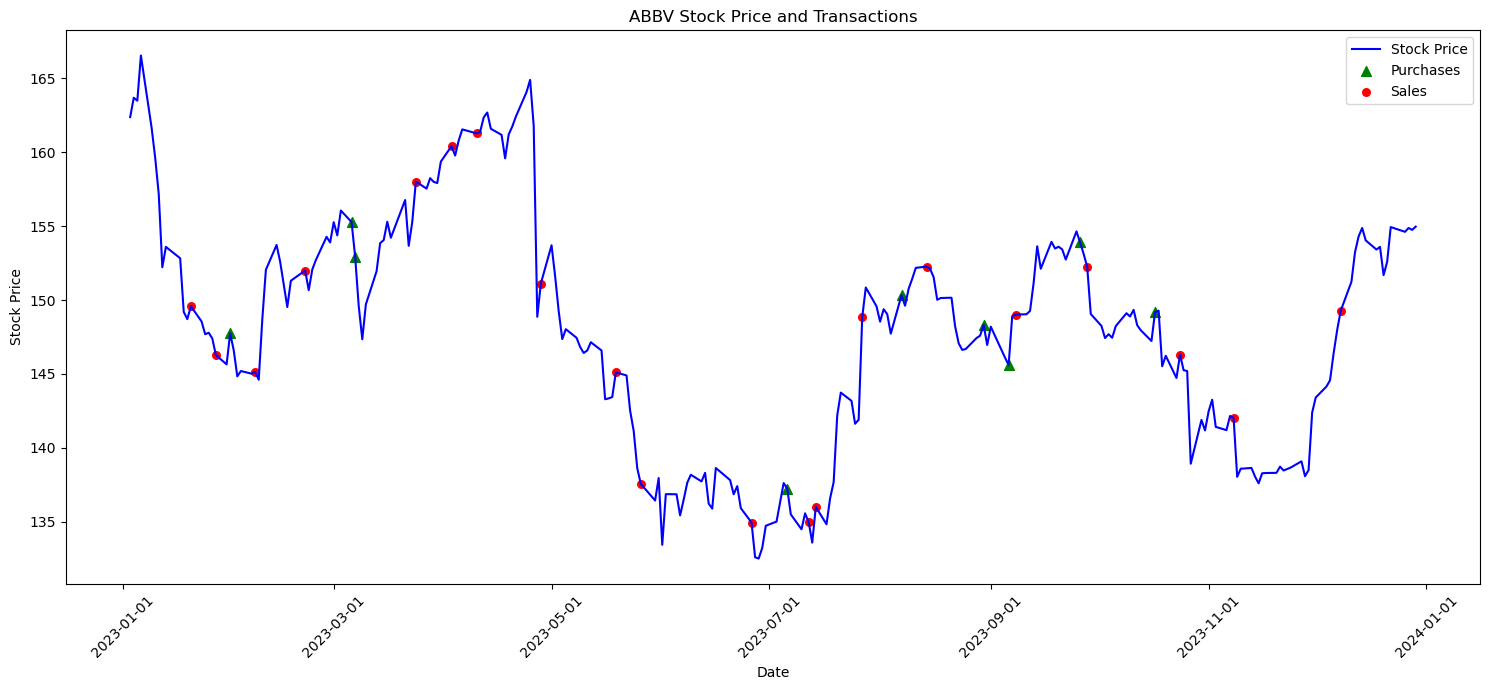

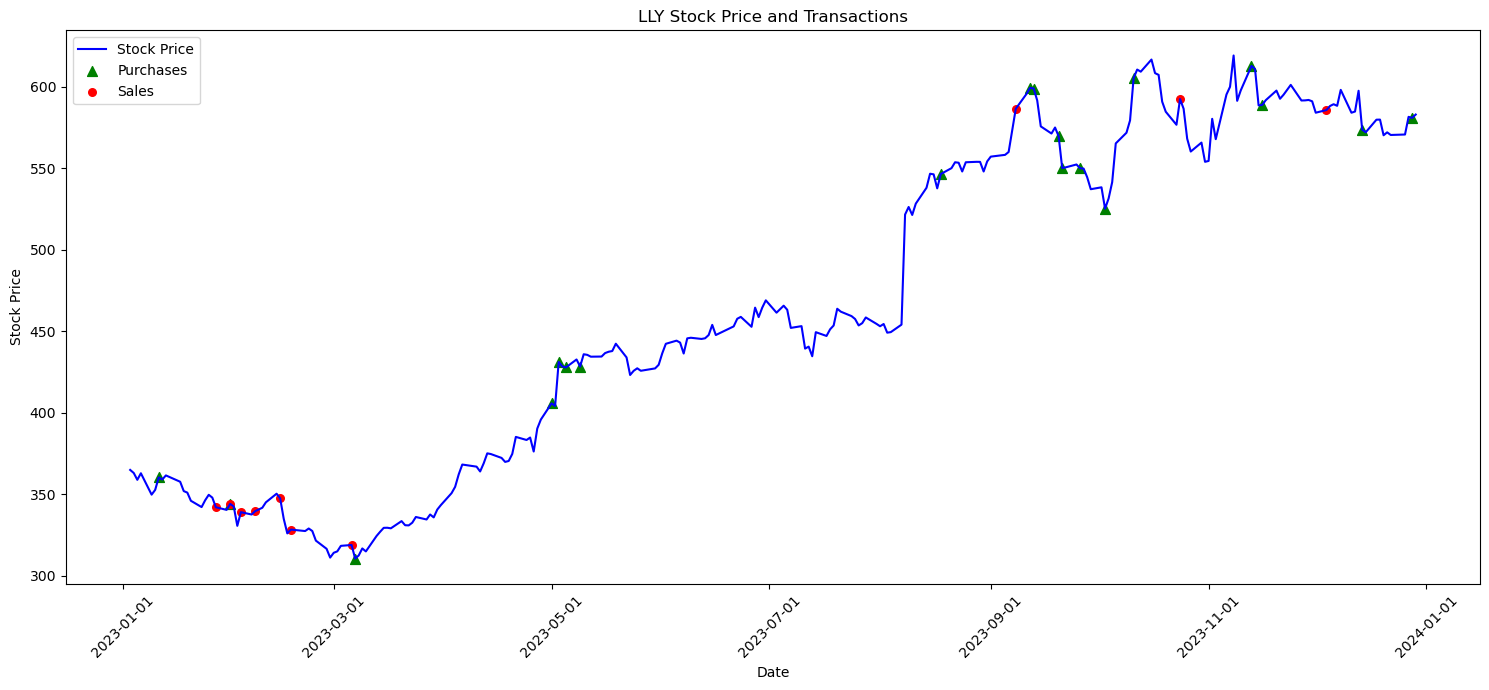

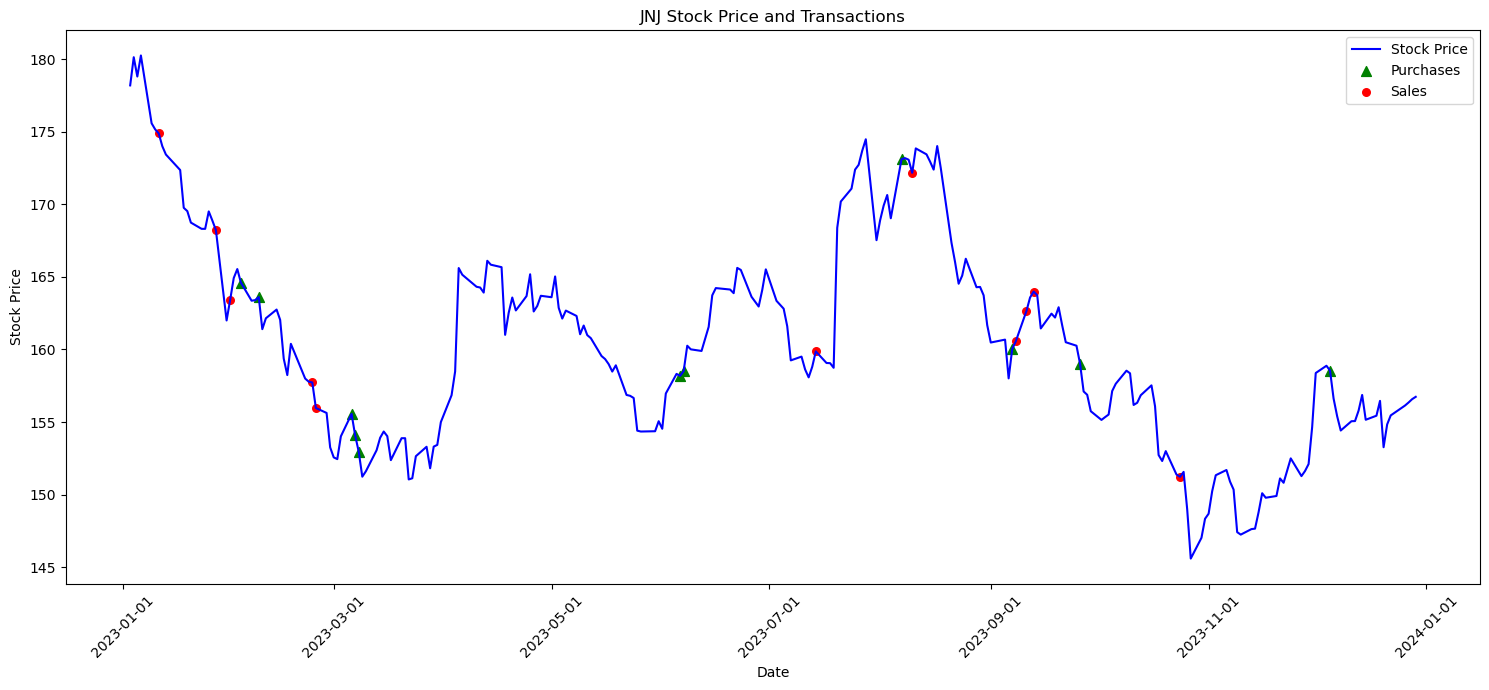

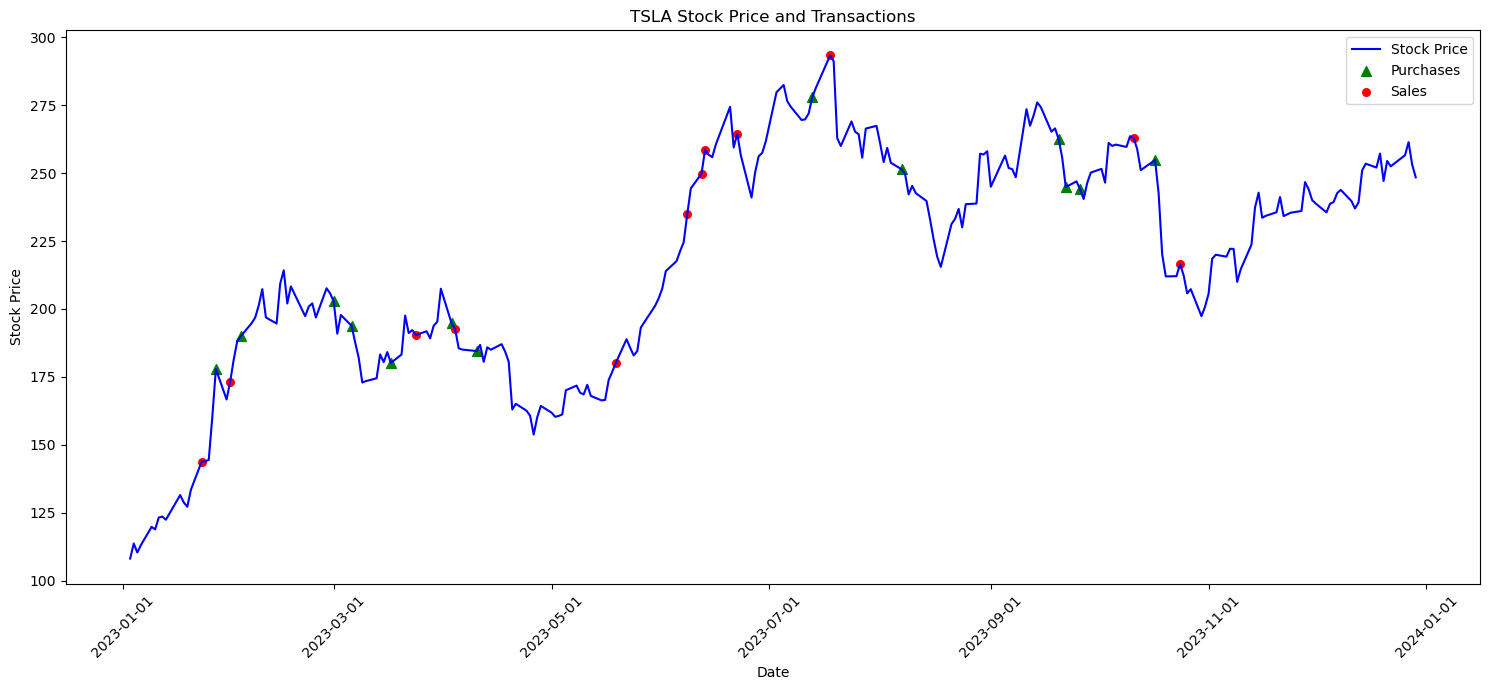

In [5]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_stock_with_transactions(ticker, stock_data, trades_2023):
    """
    Plot stock price and transactions for a given ticker.
    
    Parameters:
    ticker (str): The stock ticker symbol
    stock_data (dict): Dictionary containing DataFrames of stock data
    trades_2023 (DataFrame): DataFrame containing trade data for all stocks
    """
    if ticker not in stock_data:
        print(f"No data available for {ticker}")
        return
    
    stock_df = stock_data[ticker]
    
    fig, ax = plt.subplots(figsize=(15, 7))
    
    # Plot stock price
    ax.plot(stock_df.index, stock_df['Close'], label='Stock Price', color='blue')
    
    # Filter transactions for this ticker
    ticker_trans = trades_2023[trades_2023['Ticker'] == ticker]
    
    # Plot purchases
    purchases = ticker_trans[(ticker_trans['Transaction'] == 'Purchase') | (ticker_trans['Transaction'] == 'Purchase (Partial)')]
    # Get common dates
    common_dates_purchases = stock_df.index.intersection(purchases['Traded'])
    ax.scatter(common_dates_purchases, stock_df.loc[common_dates_purchases, 'Close'], 
               color='green', marker='^', s=50, label='Purchases')
    
    # Plot sales
    sales = ticker_trans[(ticker_trans['Transaction'] == 'Sale') | (ticker_trans['Transaction'] == 'Sale (Partial)')]
    # Get common dates
    common_dates_sales = stock_df.index.intersection(sales['Traded'])
    ax.scatter(common_dates_sales, stock_df.loc[common_dates_sales, 'Close'], 
               color='red', marker='o', s=30, label='Sales')
    
    # Customize the plot
    ax.set_title(f'{ticker} Stock Price and Transactions')
    ax.set_xlabel('Date')
    ax.set_ylabel('Stock Price')
    ax.legend()
    
    # Format x-axis to show dates nicely
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming stock_data and trades_2023 are already defined
for ticker in stock_data.keys():
   plot_stock_with_transactions(ticker, stock_data, trades_2023)
   

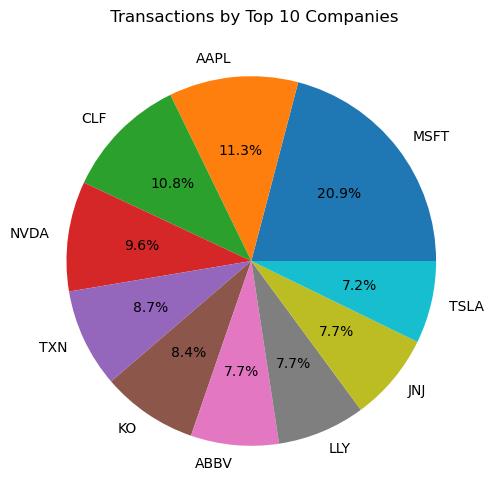

In [6]:
# Group by 'Company' and count unique 'Transaction'
Assets = trades_2023.groupby('Ticker')['Transaction'].count()

# Sort in descending order and get the top 10
top_10_Assets = Assets.sort_values(ascending=False).head(10)

 #Create a pie chart for the top 10 companies
plt.figure(figsize=(10,6))
plt.pie(top_10_Assets, labels = top_10_Assets.index, autopct='%1.1f%%')
plt.title(' Transactions by Top 10 Companies')
plt.show()

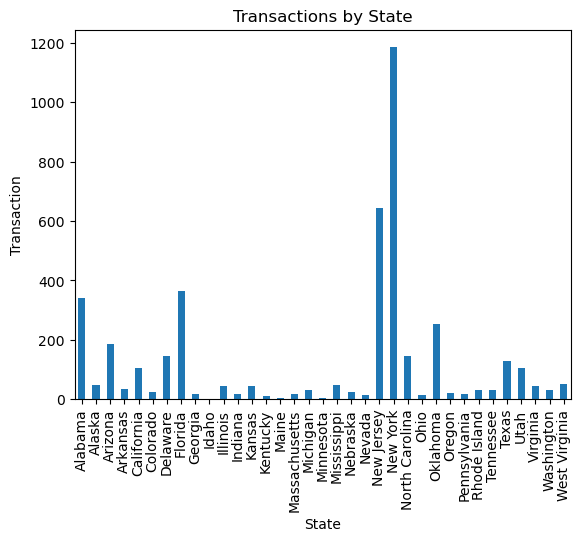

In [7]:
states = trades_2023.groupby('State')['Transaction'].count()

states.plot.bar()
plt.ylabel('Transaction')
plt.title('Transactions by State')
plt.show()

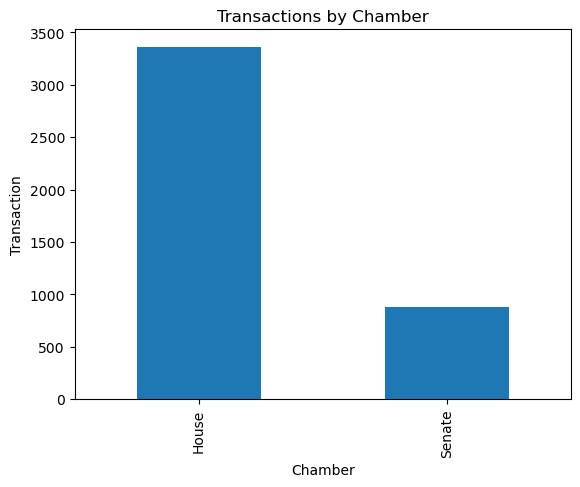

In [8]:
chambers = trades_2023.groupby('Chamber')['Transaction'].count()

chambers.plot.bar()
plt.ylabel('Transaction')
plt.title('Transactions by Chamber')
plt.show()

In [10]:
# Group by Ticker and calculate mean excess return
ticker_performance = trades_2023.groupby('Ticker')['excess_return'].mean().reset_index()

# Sort by excess return in descending order and get top 10
top_10_tickers = ticker_performance.sort_values('excess_return', ascending=False).head(10)

# Display the results
print("Top 10 Best Performing Tickers by Excess Return:")
print(top_10_tickers.to_string(index=False))

Top 10 Best Performing Tickers by Excess Return:
Ticker  excess_return
  AFRM     177.992022
  IBRX     165.038729
  NVDA     154.963184
  NTNX     124.583523
   NGL     117.340395
  COIN     116.272301
    XP     102.843575
  CRWD     101.263847
 DSCSY      87.025143
  QTWO      83.730174
